In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

In [16]:
df = pd.read_excel(r"C:\Users\adsad\OneDrive\Desktop\神預(工作)\MLB\feature_all.xlsx")

df1 = df[["比賽時間","主隊","客隊","主隊得分","客隊得分","主勝(終)","主勝(初)","客勝(終)","客勝(初)","主勝率(終)","主勝率(初)","客勝率(終)","客勝率(初)","返還率(初)","返還率(終)"]]
df1.index = df1["比賽時間"]
df1 = df1.drop(["比賽時間"],axis = 1)
#df = df.drop(["主勝(初)","客勝(初)","主勝率(初)","客勝率(初)","返還率(初)","主勝(終)","客勝(終)","主勝率(終)","客勝率(終)","返還率(終)"],axis = 1)
#df = df.drop(["主勝(終)","客勝(終)","主勝率(終)","客勝率(終)","返還率(終)"],axis = 1)
df  = df.dropna()
column_names = ["比賽時間","主隊","主隊得分","客隊","客隊得分"]
df.drop_duplicates(subset=column_names,keep="first",inplace =True)
df.index = df["比賽時間"]
df = df.drop(["比賽時間"],axis = 1)
df

,主隊,主隊得分,客隊,客隊得分,W/L,Evencode,互對戰勝率(主),互對戰勝率(客),近期對戰勝率(主),近期對戰勝率(客),...,主勝(初),客勝(初),主勝率(初),客勝率(初),返還率(初),主勝(終),客勝(終),主勝率(終),客勝率(終),返還率(終)
比賽時間,,,,,,,,,,,,,,,,,,,,,
2015-03-04 02:04:59.999999,PHI,5,NYY,5,1,65819,55.0,45.0,35.0,55.0,...,1.83,1.94,51.51,48.49,94.01,1.78,2.01,53.00,47.00,94.30
2015-03-04 02:04:59.999999,DET,15,BAL,2,1,65818,45.0,55.0,65.0,50.0,...,1.75,2.03,53.69,46.31,94.01,1.74,2.05,54.05,45.95,94.27
2015-03-04 02:07:00.000000,TOR,7,PIT,8,0,65820,35.7,64.3,50.0,65.0,...,1.73,2.07,54.42,45.58,94.09,1.74,2.05,54.01,45.99,94.07
2015-03-04 04:05:00.000000,CIN,10,CLE,0,1,65821,30.0,70.0,45.0,50.0,...,1.75,2.03,53.77,46.23,94.00,1.75,2.04,53.83,46.17,94.19
2015-03-04 04:05:00.000000,OAK,9,SFG,4,1,65822,70.0,30.0,40.0,50.0,...,1.78,2.00,52.95,47.05,94.04,1.80,1.98,52.45,47.55,94.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28 08:08:00.000000,HOU,7,ATL,2,1,115828,45.0,55.0,60.0,65.0,...,1.86,1.97,51.45,48.55,95.44,1.84,1.99,52.01,47.99,95.61
2021-10-30 08:08:00.000000,ATL,2,HOU,0,1,115830,45.0,55.0,65.0,60.0,...,1.89,1.92,50.44,49.56,95.29,1.78,2.07,53.73,46.27,95.53
2021-10-31 09:08:00.000000,ATL,3,HOU,2,1,115827,45.0,55.0,65.0,60.0,...,1.89,1.93,50.51,49.49,95.32,2.07,1.81,46.72,53.28,95.54


In [17]:
df["賠率變化(主)"] = df["主勝(終)"] - df["主勝(初)"]
df["賠率變化(客)"] = df["客勝(終)"] - df["客勝(初)"]
df["勝率變化(主)"] = df["主勝率(終)"] - df["主勝率(初)"]
df["勝率變化(客)"] = df["客勝率(終)"] - df["客勝率(初)"]

In [18]:
df_x = df.drop(["主隊","主隊得分","客隊","客隊得分","W/L","Evencode","主勝(初)","客勝(初)","主勝率(初)","客勝率(初)","返還率(初)"],axis = 1)
df_y = df["W/L"]

In [19]:
df_x_train = df_x[:"2021-01-01"]
x_test = df_x["2021-01-01":]
df_y_train = df_y[:"2021-01-01"]
y_test = df_y["2021-01-01":]
df_x_train.shape,x_test.shape,df_y_train.shape,y_test.shape

((9789, 239), (2457, 239), (9789,), (2457,))

In [20]:
x_train, x_val, y_train, y_val = train_test_split(df_x_train, df_y_train, test_size = 0.3, random_state = 499)

In [21]:
x_train.shape,y_train.shape

((6852, 239), (6852,))

In [22]:
m = 12
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(m,'Score'))  #print 5 best features

           Specs       Score
233       客勝率(終)  200.681672
232       主勝率(終)  200.680188
230        主勝(終)  190.154352
231        客勝(終)  188.555554
193      勝出機率(客)   77.073498
145      勝出機率(主)   75.481257
227  實際貢獻(投手)(客)   72.760826
223    投手獲勝機率(客)   71.941832
199      實際貢獻(客)   64.691705
188       上壘率(客)   62.931308
175    投手獲勝機率(主)   56.471310
4          客隊ELO   53.192812


In [23]:
x_train_10 = x_train[featureScores.nlargest(m,'Score')["Specs"].values]
x_val_10 = x_val[featureScores.nlargest(m,'Score')["Specs"].values]
x_test_10 = x_test[featureScores.nlargest(m,'Score')["Specs"].values]

In [24]:
x_train_10["實際貢獻(投手)(主)"] = x_train["實際貢獻(投手)(主)"]
x_train_10["上壘率(主)"] = x_train["上壘率(主)"]
x_train_10["主隊ELO"] = x_train["主隊ELO"]
x_val_10["實際貢獻(投手)(主)"] = x_val["實際貢獻(投手)(主)"]
x_val_10["上壘率(主)"] = x_val["上壘率(主)"]
x_val_10["主隊ELO"] = x_val["主隊ELO"]
x_test_10["實際貢獻(投手)(主)"] = x_test["實際貢獻(投手)(主)"]
x_test_10["上壘率(主)"] = x_test["上壘率(主)"]
x_test_10["主隊ELO"] = x_test["主隊ELO"]

<ipython-input-24-ab1a83899e18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_10["實際貢獻(投手)(主)"] = x_train["實際貢獻(投手)(主)"]
<ipython-input-24-ab1a83899e18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_10["上壘率(主)"] = x_train["上壘率(主)"]
<ipython-input-24-ab1a83899e18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [254]:
x_train_10["勝出機率(客)"] = x_train["勝出機率(客)"]
x_train_10["實際貢獻(客)"] = x_train["實際貢獻(客)"]
x_train_10["被安打數(投手)(客)"] = x_train["被安打數(投手)(客)"]
x_train_10["被得分數(客)"] = x_train["被得分數(客)"]
x_train_10["責任失分(主)"] = x_train["責任失分(主)"]
x_train_10["GSc(主)"] = x_train["GSc(主)"]
x_val_10["勝出機率(客)"] = x_val["勝出機率(客)"]
x_val_10["實際貢獻(客)"] = x_val["實際貢獻(客)"]
x_val_10["被安打數(投手)(客)"] = x_val["被安打數(投手)(客)"]
x_val_10["被得分數(客)"] = x_val["被得分數(客)"]
x_val_10["責任失分(主)"] = x_val["責任失分(主)"]
x_val_10["GSc(主)"] = x_val["GSc(主)"]
x_test_10["勝出機率(客)"] = x_test["勝出機率(客)"]
x_test_10["實際貢獻(客)"] = x_test["實際貢獻(客)"]
x_test_10["被安打數(投手)(客)"] = x_test["被安打數(投手)(客)"]
x_test_10["被得分數(客)"] = x_test["被得分數(客)"]
x_test_10["責任失分(主)"] = x_test["責任失分(主)"]
x_test_10["GSc(主)"] = x_test["GSc(主)"]

C:\Users\GUESS3~1\AppData\Local\Temp/ipykernel_9488/2027448853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_10["勝出機率(客)"] = x_train["勝出機率(客)"]
C:\Users\GUESS3~1\AppData\Local\Temp/ipykernel_9488/2027448853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_10["實際貢獻(客)"] = x_train["實際貢獻(客)"]
C:\Users\GUESS3~1\AppData\Local\Temp/ipykernel_9488/2027448853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [647]:
x_train_10["SIERA(主)"] = x_train["SIERA(主)"]
x_train_10["SIERA(客)"] = x_train["SIERA(客)"]
x_train_10["主隊ELO"] = x_train["主隊ELO"]
x_train_10["客隊ELO"] = x_train["客隊ELO"]
x_val_10["SIERA(主)"] = x_val["SIERA(主)"]
x_val_10["SIERA(客)"] = x_val["SIERA(客)"]
x_val_10["主隊ELO"] = x_val["主隊ELO"]
x_val_10["客隊ELO"] = x_val["客隊ELO"]
x_test_10["SIERA(主)"] = x_test["SIERA(主)"]
x_test_10["SIERA(客)"] = x_test["SIERA(客)"]
x_test_10["主隊ELO"] = x_test["主隊ELO"]
x_test_10["客隊ELO"] = x_test["客隊ELO"]

C:\Users\GUESS3~1\AppData\Local\Temp/ipykernel_9488/3055254514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_10["SIERA(主)"] = x_train["SIERA(主)"]
C:\Users\GUESS3~1\AppData\Local\Temp/ipykernel_9488/3055254514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_10["SIERA(客)"] = x_train["SIERA(客)"]
C:\Users\GUESS3~1\AppData\Local\Temp/ipykernel_9488/3055254514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [648]:
#scl = StandardScaler()
#x_train_sd = scl.fit_transform(x_train)
#x_val_sd = scl.transform(x_val)
#x_test_sd =  scl.transform(x_test)

In [25]:
scl = StandardScaler()
x_train_sd = scl.fit_transform(x_train_10)
x_val_sd = scl.transform(x_val_10)
x_test_sd =  scl.transform(x_test_10)

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_test1 = {"gamma" : [0.1,0.05,0.001,0.002]}
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth = 3,gamma=0.001,min_child_wight = 1,objective="binary:logistic",cvolsample_bytree=0.8)
xgb = GridSearchCV(xgboostModel,param_test1,scoring= "roc_auc",n_jobs=4,cv=5)
xgb = xgboostModel
# 使用訓練資料訓練模型
xgb.fit(x_train_sd, y_train)

C:\Users\adsad\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cvolsample_bytree", "min_child_wight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, cvolsample_bytree=0.8,
              gamma=0.001, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, min_child_wight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [27]:
# 預測成功的比例
print('訓練集: ',xgboostModel.score(x_train_sd,y_train))
print('驗證集: ',xgboostModel.score(x_val_sd,y_val))
print('測試集: ',xgboostModel.score(x_test_sd,y_test))

訓練集:  0.5954465849387041
驗證集:  0.564521620701396
測試集:  0.6231176231176231


C:\Users\adsad\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\adsad\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\adsad\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [28]:
pre = xgboostModel.predict(x_test_sd)
pre

C:\Users\adsad\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

In [30]:
logistic_regression_classifier = LogisticRegressionCV(cv=3,max_iter=1000)

elastic_net_classifier = LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga',max_iter=1000)

In [31]:
logistic_regression_classifier.fit(x_train_sd, y_train)
elastic_net_classifier.fit(x_train_sd, y_train)

LogisticRegressionCV(cv=3, l1_ratios=[0.1, 0.5, 0.9], max_iter=1000,
                     penalty='elasticnet', solver='saga')

In [32]:
#the models score
print("Elastic Net train: {} || Elastic Net validation: {}".format(elastic_net_classifier.score(x_train_sd,y_train), 
                                                         elastic_net_classifier.score(x_val_sd, y_val)))

# Print out some more metrics
print("Elastic Net train")
print(classification_report(y_train, elastic_net_classifier.predict(x_train_sd)))
print("Elastic Net validation")
print(classification_report(y_val, elastic_net_classifier.predict(x_val_sd)))

Elastic Net train: 0.5847927612375948 || Elastic Net validation: 0.5842696629213483
Elastic Net train
              precision    recall  f1-score   support

           0       0.57      0.42      0.48      3165
           1       0.59      0.72      0.65      3687

    accuracy                           0.58      6852
   macro avg       0.58      0.57      0.57      6852
weighted avg       0.58      0.58      0.57      6852

Elastic Net validation
              precision    recall  f1-score   support

           0       0.57      0.43      0.49      1363
           1       0.59      0.72      0.65      1574

    accuracy                           0.58      2937
   macro avg       0.58      0.57      0.57      2937
weighted avg       0.58      0.58      0.57      2937



In [35]:
print("Elastic Nettest: {} ".format(elastic_net_classifier.score(x_test_sd,y_test)))
print("Elastic Net test")
print(classification_report(y_test, elastic_net_classifier.predict(x_test_sd)))

Elastic Nettest: 0.5608465608465608 
Elastic Net test
              precision    recall  f1-score   support

           0       0.53      0.45      0.48      1129
           1       0.58      0.66      0.62      1328

    accuracy                           0.56      2457
   macro avg       0.55      0.55      0.55      2457
weighted avg       0.56      0.56      0.56      2457



In [36]:
pre = elastic_net_classifier.predict(x_test_sd)
pre

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
import pickle

In [38]:
# save the model to disk
#filename = r"C:\Users\Guess365User\Desktop\MLB\MLB_ELASTIC_NET.h5"
#pickle.dump(elastic_net_classifier, open(filename, 'wb'))

In [128]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from keras import regularizers

Epoch 1/100
215/215 [==============================] - 1s 4ms/step - loss: 0.9798 - accuracy: 0.5251 - val_loss: 0.9552 - val_accuracy: 0.5710
Epoch 2/100
215/215 [==============================] - 1s 3ms/step - loss: 0.9518 - accuracy: 0.5678 - val_loss: 0.9361 - val_accuracy: 0.5798
Epoch 3/100
215/215 [==============================] - 1s 3ms/step - loss: 0.9313 - accuracy: 0.5790 - val_loss: 0.9200 - val_accuracy: 0.5802
Epoch 4/100
215/215 [==============================] - 1s 3ms/step - loss: 0.9156 - accuracy: 0.5784 - val_loss: 0.9051 - val_accuracy: 0.5815
Epoch 5/100
215/215 [==============================] - 1s 3ms/step - loss: 0.9037 - accuracy: 0.5747 - val_loss: 0.8913 - val_accuracy: 0.5815
Epoch 6/100
215/215 [==============================] - 1s 3ms/step - loss: 0.8859 - accuracy: 0.5829 - val_loss: 0.8783 - val_accuracy: 0.5839
Epoch 7/100
215/215 [==============================] - 1s 3ms/step - loss: 0.8763 - accuracy: 0.5814 - val_loss: 0.8661 - val_accuracy: 0.5860

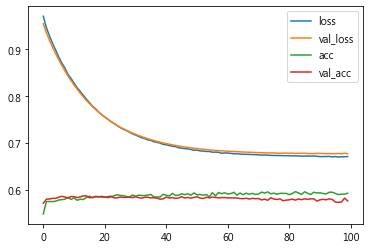

In [421]:
model = Sequential() 
model.add(Dense(512, input_dim=x_train_sd.shape[1],kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  

sgd = keras.optimizers.SGD(lr=0.005, momentum=0.3)
RMSprop = keras.optimizers.RMSprop(
    learning_rate=0.0005,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name='RMSprop'
)
Adagrad = keras.optimizers.Adagrad(
    learning_rate=0.0001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad')

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) 
r = model.fit(x_train_sd, y_train, validation_data =(x_val_sd, y_val), epochs=100,batch_size = 32)
print("train:",model.evaluate(x_train_sd, y_train))
print("val: ",model.evaluate(x_val_sd, y_val))

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

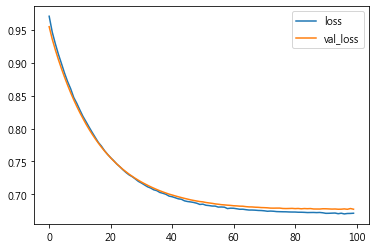

In [424]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

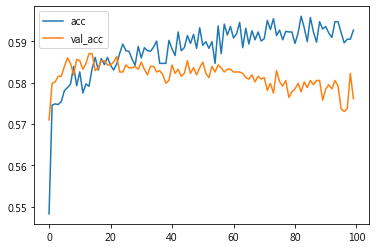

In [425]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [426]:
model.evaluate(x_test_sd,y_test)

77/77 [==============================] - 0s 632us/step - loss: 0.6679 - accuracy: 0.5950


[0.6679250001907349, 0.5950345993041992]

In [387]:
#model.save(r"C:\Users\Guess365User\Desktop\MLB\MLB_pre59.h5")

In [427]:
pre = (model.predict(x_test_sd)>0.5)*1
pre

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [428]:
def plot_roc_curve(fper, tper):
    auc_rate = auc(fper,tper)
    plt.figure(figsize=(10, 10))
    plt.plot(fper, tper, color='red', label=f'ROC (AUC = {round(auc_rate,2)})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

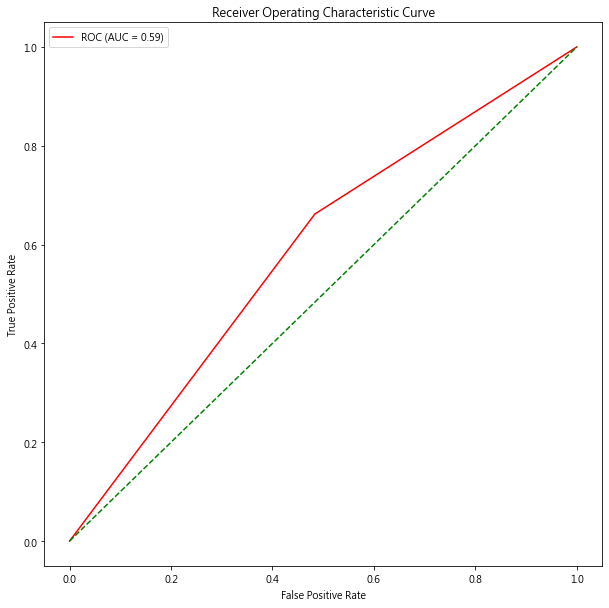

In [429]:
fper, tper, thresholds = roc_curve(y_test,pre)
plot_roc_curve(fper, tper)

In [430]:
C2= confusion_matrix(pre,y_test,labels=[1,0]) 
C2

array([[879, 546],
       [449, 583]], dtype=int64)

In [432]:
df_x = df.drop(["W/L","Evencode"],axis = 1)
df_y = df["W/L"]

In [433]:
df_x_train = df_x[:"2021-01-01"]
x_test = df_x["2021-01-01":]
df_y_train = df_y[:"2021-01-01"]
y_test = df_y["2021-01-01":]
df_x_train.shape,x_test.shape,df_y_train.shape,y_test.shape

((9789, 248), (2457, 248), (9789,), (2457,))

In [434]:
x_train, x_val, y_train, y_val = train_test_split(df_x_train, df_y_train, test_size = 0.3, random_state = 499)

In [435]:
odd = pd.DataFrame(pre,index = y_test.index,columns= ["predict"])
odd["true"] = y_test.values
#odd_hn = df1["主隊"]["2021-01-01":]
#odd_an = df1["客隊"]["2021-01-01":]
#odd_a = df1["客勝(終)"]["2021-01-01":]
#odd_h = df1["主勝(終)"]["2021-01-01":]
#odd_a_f = df1["客勝(初)"]["2021-01-01":]
#odd_h_f = df1["主勝(初)"]["2021-01-01":]
#odd["主隊"] = odd_hn
#odd["客隊"] = odd_an
#odd["客勝(初)"] = odd_a_f
#odd["主勝(初)"] = odd_h_f
#odd["客勝(終)"] = odd_a
#odd["主勝(終)"] = odd_h
odd["主隊"] = x_test["主隊"]
odd["主隊得分"] = x_test["主隊得分"]
odd["客隊"] = x_test["客隊"]
odd["客隊得分"] = x_test["客隊得分"]
odd["客勝(終)"] = x_test["客勝(終)"]
odd["主勝(終)"] = x_test["主勝(終)"]


odd = odd.dropna()
odd

,predict,true,主隊,主隊得分,客隊,客隊得分,客勝(終),主勝(終)
比賽時間,,,,,,,,
2021-04-02 01:05:00.000000,0,0,NYY,2,TOR,3,2.61,1.52
2021-04-02 01:10:00.000000,1,1,DET,3,CLE,2,1.53,2.57
2021-04-02 02:10:00.000000,1,1,MIL,6,MIN,5,1.96,1.88
2021-04-02 02:20:00.000000,1,0,CHC,3,PIT,5,2.82,1.45
2021-04-02 03:05:00.000000,1,1,PHI,3,ATL,2,2.09,1.78
...,...,...,...,...,...,...,...,...
2021-10-28 08:08:00.000000,0,1,HOU,7,ATL,2,1.99,1.84
2021-10-30 08:08:00.000000,1,1,ATL,2,HOU,0,2.07,1.78
2021-10-31 09:08:00.000000,0,1,ATL,3,HOU,2,1.81,2.07


In [436]:
money_count = []
win_all = []
money = 0
for i in range(len(odd)):
    if odd["predict"][i] == odd["true"][i]:
        if odd["predict"][i] == 1:
            win = 1000 * (odd["主勝(終)"][i] - 1)
        elif odd["predict"][i] == 0:
            win = 1000 * (odd["客勝(終)"][i] - 1)
    else:
            win = -1000
    money += win
    money_count.append(money)
    win_all.append(win)
money

53700.0

In [437]:
odd["每筆獲利"] = win_all
odd["累計獲利"] = money_count
odd

,predict,true,主隊,主隊得分,客隊,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,
2021-04-02 01:05:00.000000,0,0,NYY,2,TOR,3,2.61,1.52,1610.0,1610.0
2021-04-02 01:10:00.000000,1,1,DET,3,CLE,2,1.53,2.57,1570.0,3180.0
2021-04-02 02:10:00.000000,1,1,MIL,6,MIN,5,1.96,1.88,880.0,4060.0
2021-04-02 02:20:00.000000,1,0,CHC,3,PIT,5,2.82,1.45,-1000.0,3060.0
2021-04-02 03:05:00.000000,1,1,PHI,3,ATL,2,2.09,1.78,780.0,3840.0
...,...,...,...,...,...,...,...,...,...,...
2021-10-28 08:08:00.000000,0,1,HOU,7,ATL,2,1.99,1.84,-1000.0,52070.0
2021-10-30 08:08:00.000000,1,1,ATL,2,HOU,0,2.07,1.78,780.0,52850.0
2021-10-31 09:08:00.000000,0,1,ATL,3,HOU,2,1.81,2.07,-1000.0,51850.0


In [438]:
odd_profit = odd[odd["每筆獲利"] >= 2000]
odd_profit

,predict,true,主隊,主隊得分,客隊,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,


In [539]:
odd_profit = odd[odd["每筆獲利"] < 0]
a = odd_profit[odd_profit["每筆獲利"] >= 0]
odd_profit

,predict,true,主隊,主隊得分,客隊,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,
2021-04-02 02:20:00,1,0,CHC,3,PIT,5,2.82,1.45,-1000.0,3060.0
2021-04-02 04:10:00,0,1,COL,8,LAD,5,1.44,2.85,-1000.0,2840.0
2021-04-02 04:10:00,1,0,CIN,6,STL,11,2.09,1.77,-1000.0,2880.0
2021-04-02 10:05:00,0,1,LAA,4,CHW,3,1.82,2.03,-1000.0,2500.0
2021-04-02 10:07:00,1,0,OAK,1,HOU,8,1.92,1.91,-1000.0,1500.0
...,...,...,...,...,...,...,...,...,...,...
2021-10-22 08:08:00,0,1,LAD,11,ATL,2,2.14,1.73,-1000.0,54000.0
2021-10-23 08:08:00,0,1,HOU,5,BOS,0,1.96,1.87,-1000.0,53000.0
2021-10-24 08:08:00,0,1,ATL,4,LAD,2,1.65,2.29,-1000.0,52000.0


In [440]:
odd["每筆獲利"].mean()

21.855921855921856

In [441]:
import numpy as np

In [442]:
o_max = np.argmax(odd["累計獲利"])
o_min = np.argmin(odd["累計獲利"])
show_max = (odd["累計獲利"].max())
show_min = str(odd["累計獲利"].min())

In [443]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec # 畫圖網格佈局

In [444]:
o_max = odd[odd["累計獲利"] ==odd["累計獲利"].max()]
o_min = odd[odd["累計獲利"] ==odd["累計獲利"].min()]
o_max["累計獲利"]

比賽時間
2021-08-15 07:10:00    89690.0
2021-08-15 07:10:00    89690.0
Name: 累計獲利, dtype: float64

In [445]:
odd["2021-08-15"]

<ipython-input-445-35b4c098b183>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  odd["2021-08-15"]


,predict,true,主隊,主隊得分,客隊,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,
2021-08-15 02:29:59.999999,0,1,PIT,14,MIL,4,1.45,2.81,-1000.0,84980.0
2021-08-15 04:05:00.000000,1,1,PHI,6,CIN,1,1.75,2.11,1110.0,86090.0
2021-08-15 04:10:00.000000,1,1,BOS,16,BAL,2,3.63,1.29,290.0,86380.0
2021-08-15 06:05:00.000000,0,0,WSN,2,ATL,12,1.58,2.43,580.0,86960.0
2021-08-15 06:10:00.000001,1,1,MIA,5,CHC,4,2.40,1.59,590.0,87550.0
2021-08-15 06:10:00.000001,1,1,DET,6,CLE,4,2.12,1.73,730.0,88280.0
2021-08-15 07:05:00.000000,0,0,PIT,0,MIL,6,1.49,2.67,490.0,88770.0
2021-08-15 07:05:00.000000,0,0,TEX,3,OAK,8,1.42,2.92,420.0,89190.0
2021-08-15 07:10:00.000000,0,0,NYM,1,LAD,2,1.50,2.65,500.0,89690.0


In [446]:
#odd.to_excel(r"C:\Users\Guess365User\Desktop\MLB\獲利報告1.xlsx")

In [584]:
a = odd[odd["true"] == 1]
a["主勝(終)"].mean()

1.7970256024096407

In [578]:
1.65/1.81

0.9116022099447513

In [447]:
df_n_1 = odd.copy()

In [448]:
df_n_1.index = df_n_1.index.strftime("%Y-%m-%d")

In [449]:
df_2 = df_n_1.groupby("比賽時間")
for key,value in df_2:
    print(key)
    print(value)
    print(value["每筆獲利"].sum())
    print("\n")

2021-04-02
            predict  true   主隊  主隊得分   客隊  客隊得分  客勝(終)  主勝(終)    每筆獲利    累計獲利
比賽時間                                                                         
2021-04-02        0     0  NYY     2  TOR     3   2.61   1.52  1610.0  1610.0
2021-04-02        1     1  DET     3  CLE     2   1.53   2.57  1570.0  3180.0
2021-04-02        1     1  MIL     6  MIN     5   1.96   1.88   880.0  4060.0
2021-04-02        1     0  CHC     3  PIT     5   2.82   1.45 -1000.0  3060.0
2021-04-02        1     1  PHI     3  ATL     2   2.09   1.78   780.0  3840.0
2021-04-02        0     1  COL     8  LAD     5   1.44   2.85 -1000.0  2840.0
2021-04-02        0     0  MIA     0  TBR     1   1.64   2.31   640.0  3480.0
2021-04-02        1     1  SDP     8  ARI     7   3.03   1.40   400.0  3880.0
2021-04-02        1     0  CIN     6  STL    11   2.09   1.77 -1000.0  2880.0
2021-04-02        1     1  KCR    14  TEX    10   2.35   1.62   620.0  3500.0
2021-04-02        0     1  LAA     4  CHW     3   1.8

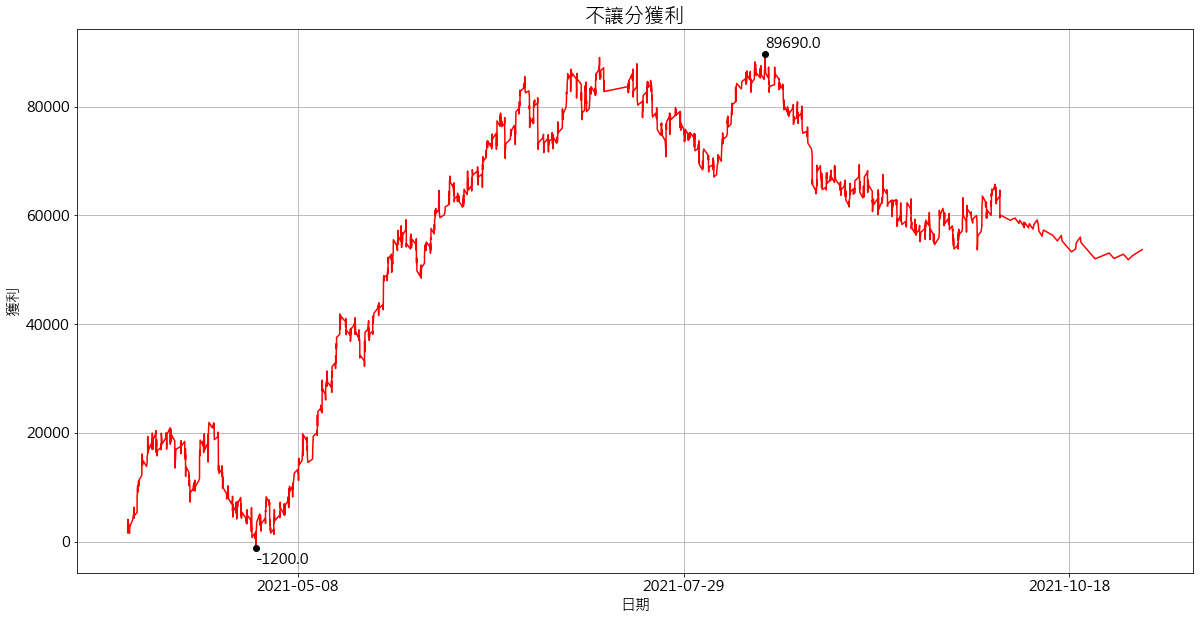

In [450]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 開新一個畫布 
fig = plt.figure(figsize=(20, 10)) # 寬10 長8
gs = GridSpec(1, 1) # 設立1x1的網格

# 設定網格及子圖
ax = plt.subplot(gs[0, 0]) # 子圖ax在網格的[0, 0]

# 畫圖

ax.plot(odd.index,odd["累計獲利"],'r')
plt.plot(o_max.index[0],int(o_max["累計獲利"][0]),"ko")
plt.plot(o_min.index,int(o_min["累計獲利"][0]),"ko")
plt.xlabel("日期",fontsize=15)
plt.ylabel("獲利",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("不讓分獲利",fontsize=20)
plt.annotate(show_max,xy=(o_max.index[0],int(o_max["累計獲利"][0])),xytext = (o_max.index[0],int(o_max["累計獲利"][0])+1000),fontsize=15)
plt.annotate(show_min,xy=(o_min.index,int(o_min["累計獲利"])),xytext = (o_min.index,int(o_min["累計獲利"])-3000),fontsize=15)
plt.grid()
# 圖調整
tick_spacing = odd.index.size/30 # x軸密集度
ax.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))
plt.show()

In [592]:
pre_train_ = (model.predict(x_train_sd)>0.5)*1
pre_train = pd.DataFrame(index=y_train.index,columns=["predict","true"])
pre_train["predict"] = pre_train_
pre_train["true"] = y_train
pre_train["主隊"] = x_train["主隊"]
pre_train["客隊"] = x_train["客隊"]
pre_train["主隊得分"] = x_train["主隊得分"]
pre_train["客隊得分"] = x_train["客隊得分"]
pre_train["主勝(終)"] = x_train["主勝(終)"]
pre_train["客勝(終)"] = x_train["客勝(終)"]

pre_train

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2018-06-14 08:15:00.000000,0,0,KCR,CIN,0,7,2.05,1.77
2018-04-11 06:10:00.000001,1,1,CLE,DET,5,1,1.34,3.27
2015-08-06 03:10:00.000001,0,1,COL,SEA,7,5,2.01,1.79
2015-07-26 07:10:00.000000,0,1,NYM,LAD,15,2,1.76,2.06
2015-08-05 08:40:00.000000,1,0,COL,SEA,4,10,1.88,1.91
...,...,...,...,...,...,...,...,...
2016-09-06 01:10:00.000000,1,0,TBR,BAL,3,7,1.82,1.99
2017-08-09 09:40:00.000000,0,1,ARI,LAD,6,3,2.10,1.74
2017-05-17 07:05:00.000000,0,0,PIT,WSN,4,8,2.41,1.58


In [452]:
pre_train_ = (logistic_regression_classifier.predict(x_train_sd)>0.5)*1
pre_train = pd.DataFrame(index=y_train.index,columns=["predict","true"])
pre_train["predict"] = pre_train_
pre_train["true"] = y_train
pre_train["主隊"] = x_train["主隊"]
pre_train["客隊"] = x_train["客隊"]
pre_train["主隊得分"] = x_train["主隊得分"]
pre_train["客隊得分"] = x_train["客隊得分"]
pre_train["主勝(終)"] = x_train["主勝(終)"]
pre_train["客勝(終)"] = x_train["客勝(終)"]

pre_train

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2018-06-14 08:15:00.000000,0,0,KCR,CIN,0,7,2.05,1.77
2018-04-11 06:10:00.000001,1,1,CLE,DET,5,1,1.34,3.27
2015-08-06 03:10:00.000001,0,1,COL,SEA,7,5,2.01,1.79
2015-07-26 07:10:00.000000,0,1,NYM,LAD,15,2,1.76,2.06
2015-08-05 08:40:00.000000,1,0,COL,SEA,4,10,1.88,1.91
...,...,...,...,...,...,...,...,...
2016-09-06 01:10:00.000000,1,0,TBR,BAL,3,7,1.82,1.99
2017-08-09 09:40:00.000000,0,1,ARI,LAD,6,3,2.10,1.74
2017-05-17 07:05:00.000000,0,0,PIT,WSN,4,8,2.41,1.58


In [192]:
pre_train["2018-05-02"]

<ipython-input-192-ccc45c38801f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pre_train["2018-05-02"]


,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2018-05-02 08:10:00.000000,1,0,HOU,NYY,0,4,1.56,2.42
2018-05-02 07:10:00.000000,1,0,BOS,KCR,6,7,1.30,3.46
2018-05-02 07:05:00.000000,1,1,WSN,PIT,12,4,1.39,3.00
2018-05-02 07:10:00.000000,1,0,NYM,ATL,0,7,1.58,2.39
2018-05-02 08:10:00.000000,1,0,MIN,TOR,4,7,1.72,2.12
2018-05-02 06:10:00.000001,1,0,CLE,TEX,6,8,1.51,2.56
2018-05-02 07:10:00.000000,0,1,DET,TBR,2,1,2.24,1.65
2018-05-02 08:04:59.999999,1,0,CHC,COL,1,3,1.58,2.39
2018-05-02 10:07:00.000000,1,1,LAA,BAL,3,2,1.53,2.53


In [593]:
pre_val_ = (model.predict(x_val_sd)>0.5)*1
pre_val = pd.DataFrame(index=y_val.index,columns=["predict","true"])
pre_val["predict"] = pre_val_
pre_val["true"] = y_val
pre_val["主隊"] = x_val["主隊"]
pre_val["客隊"] = x_val["客隊"]
pre_val["主隊得分"] = x_val["主隊得分"]
pre_val["客隊得分"] = x_val["客隊得分"]
pre_val["主勝(終)"] = x_val["主勝(終)"]
pre_val["客勝(終)"] = x_val["客勝(終)"]
pre_val

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2016-09-17 10:15:00.000001,1,1,SFG,STL,8,2,1.83,1.98
2017-04-20 07:10:00.000000,1,1,TBR,DET,8,7,1.56,2.43
2015-07-25 08:10:00.000000,0,1,MIN,NYY,10,1,2.31,1.61
2016-07-28 07:10:00.000000,0,0,NYM,STL,4,5,2.12,1.72
2016-09-30 08:10:00.000000,1,0,CHW,TBR,3,5,1.81,2.00
...,...,...,...,...,...,...,...,...
2018-08-20 04:10:00.000000,0,0,SDP,ARI,3,4,2.69,1.50
2016-06-02 07:05:00.000000,1,1,BAL,BOS,13,9,1.92,1.88
2016-04-16 07:05:00.000000,1,0,PIT,MIL,4,8,1.69,2.17


In [194]:
pre_val_ = (logistic_regression_classifier.predict(x_val_sd)>0.5)*1
pre_val = pd.DataFrame(index=y_val.index,columns=["predict","true"])
pre_val["predict"] = pre_val_
pre_val["true"] = y_val
pre_val["主隊"] = x_val["主隊"]
pre_val["客隊"] = x_val["客隊"]
pre_val["主隊得分"] = x_val["主隊得分"]
pre_val["客隊得分"] = x_val["客隊得分"]
pre_val["主勝(終)"] = x_val["主勝(終)"]
pre_val["客勝(終)"] = x_val["客勝(終)"]
pre_val

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2016-09-17 10:15:00.000001,1,1,SFG,STL,8,2,1.83,1.98
2017-04-20 07:10:00.000000,1,1,TBR,DET,8,7,1.56,2.43
2015-07-25 08:10:00.000000,0,1,MIN,NYY,10,1,2.31,1.61
2016-07-28 07:10:00.000000,0,0,NYM,STL,4,5,2.12,1.72
2016-09-30 08:10:00.000000,1,0,CHW,TBR,3,5,1.81,2.00
...,...,...,...,...,...,...,...,...
2018-08-20 04:10:00.000000,0,0,SDP,ARI,3,4,2.69,1.50
2016-06-02 07:05:00.000000,1,1,BAL,BOS,13,9,1.92,1.88
2016-04-16 07:05:00.000000,1,0,PIT,MIL,4,8,1.69,2.17


In [195]:
pre_val["2018-05-02"]

<ipython-input-195-aa59d5ef9ce8>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pre_val["2018-05-02"]


,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2018-05-02 10:10:00,1,1,SEA,OAK,6,3,1.80,2.01
2018-05-02 07:05:00,1,1,WSN,PIT,9,3,1.39,3.00
2018-05-02 07:10:00,1,0,NYM,ATL,2,3,1.58,2.39
2018-05-02 07:10:00,0,0,CIN,MIL,6,7,1.89,1.91
2018-05-02 09:40:00,0,1,ARI,LAD,4,3,2.68,1.47
2018-05-02 07:10:00,0,0,MIA,PHI,0,6,2.41,1.57
2018-05-02 08:15:00,1,1,STL,CHW,3,2,1.41,2.91


In [594]:
df_x = pre_train.append(pre_val)
df_x = df_x.sort_values(["比賽時間"])
df_x

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2015-03-04 02:04:59.999999,1,1,DET,BAL,15,2,1.74,2.05
2015-03-04 02:04:59.999999,0,1,PHI,NYY,5,5,1.78,2.01
2015-03-04 02:07:00.000000,1,0,TOR,PIT,7,8,1.74,2.05
2015-03-04 04:05:00.000000,1,1,OAK,SFG,9,4,1.80,1.98
2015-03-04 04:05:00.000000,0,1,CIN,CLE,10,0,1.75,2.04
...,...,...,...,...,...,...,...,...
2018-10-24 08:08:59.999999,1,1,BOS,LAD,8,4,1.55,2.48
2018-10-25 08:08:59.999999,1,1,BOS,LAD,4,2,1.68,2.20
2018-10-27 08:04:59.999999,1,1,LAD,BOS,3,2,1.54,2.50


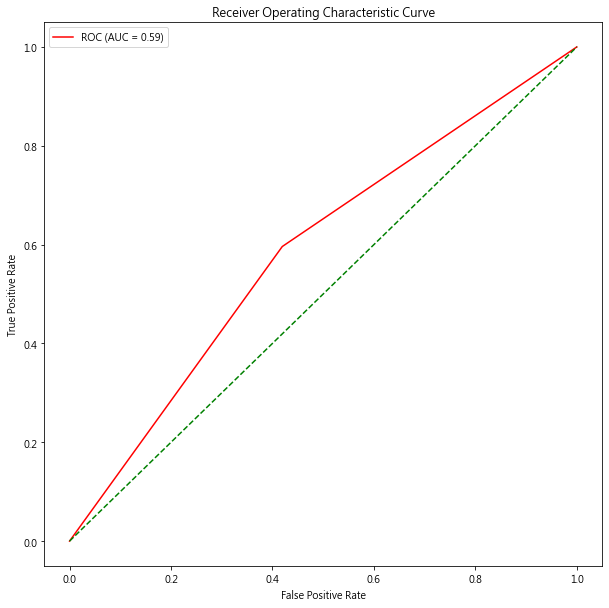

In [595]:
fper, tper, thresholds = roc_curve(df_x["predict"],df_x["true"])
plot_roc_curve(fper, tper)

In [596]:
C2= confusion_matrix(df_x["predict"],df_x["true"],labels=[1,0]) 
C2

array([[3899, 2642],
       [1362, 1886]], dtype=int64)

In [458]:
(3850+1846) / (3850+2688+1419+1846) 

0.5810466183821279

In [597]:
df_train_team = df["2015-03-04":"2020-10-28"][["主隊","客隊","主隊得分","客隊得分","主勝(終)","客勝(終)"]]
df_train_team

,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,
2015-03-04 02:04:59.999999,PHI,NYY,5,5,1.78,2.01
2015-03-04 02:04:59.999999,DET,BAL,15,2,1.74,2.05
2015-03-04 02:07:00.000000,TOR,PIT,7,8,1.74,2.05
2015-03-04 04:05:00.000000,CIN,CLE,10,0,1.75,2.04
2015-03-04 04:05:00.000000,OAK,SFG,9,4,1.80,1.98
...,...,...,...,...,...,...
2018-10-24 08:08:59.999999,BOS,LAD,8,4,1.55,2.48
2018-10-25 08:08:59.999999,BOS,LAD,4,2,1.68,2.20
2018-10-27 08:04:59.999999,LAD,BOS,3,2,1.54,2.50


In [460]:
df["2018-05-02"]

<ipython-input-460-8bc7606f7c94>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2018-05-02"]


,主隊,主隊得分,客隊,客隊得分,W/L,Evencode,互對戰勝率(主),互對戰勝率(客),近期對戰勝率(主),近期對戰勝率(客),...,返還率(初),主勝(終),客勝(終),主勝率(終),客勝率(終),返還率(終),賠率變化(主),賠率變化(客),勝率變化(主),勝率變化(客)
比賽時間,,,,,,,,,,,,,,,,,,,,,
2018-05-02 06:10:00.000001,CLE,6,TEX,8,0,89582,55.0,45.0,65.0,35.0,...,94.81,1.51,2.56,62.88,37.12,94.85,0.00,0.00,-0.04,0.04
2018-05-02 07:05:00.000000,WSN,12,PIT,4,1,89583,55.0,45.0,45.0,50.0,...,94.59,1.39,3.00,68.31,31.69,94.93,0.01,0.01,-0.05,0.05
2018-05-02 07:05:00.000000,WSN,9,PIT,3,1,89604,55.0,45.0,45.0,45.0,...,94.59,1.39,3.00,68.31,31.69,94.93,0.01,0.01,-0.05,0.05
2018-05-02 07:10:00.000000,CIN,1,MIL,3,0,89605,40.0,60.0,20.0,60.0,...,94.73,1.89,1.91,50.17,49.83,94.94,0.11,-0.11,-2.98,2.98
2018-05-02 07:10:00.000000,MIA,0,PHI,6,0,89606,45.0,55.0,45.0,65.0,...,94.91,2.41,1.57,39.53,60.47,95.18,0.06,-0.02,-0.87,0.87
2018-05-02 07:10:00.000000,NYM,0,ATL,7,0,89607,60.0,40.0,55.0,60.0,...,94.87,1.58,2.39,60.25,39.75,95.14,0.01,-0.01,-0.24,0.24
2018-05-02 07:10:00.000000,NYM,2,ATL,3,0,89588,60.0,40.0,60.0,60.0,...,94.87,1.58,2.39,60.25,39.75,95.14,0.01,-0.01,-0.24,0.24
2018-05-02 07:10:00.000000,DET,2,TBR,1,1,89586,55.0,45.0,40.0,60.0,...,94.77,2.24,1.65,42.42,57.58,95.04,0.06,-0.03,-1.02,1.02
2018-05-02 07:10:00.000000,CIN,6,MIL,7,0,89585,40.0,60.0,20.0,60.0,...,94.73,1.89,1.91,50.17,49.83,94.94,0.11,-0.11,-2.98,2.98


In [598]:
df_x = pd.merge(df_x,df_train_team,on=["比賽時間","主隊","客隊","主隊得分","客隊得分","主勝(終)","客勝(終)"])
df_x

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2015-03-04 02:04:59.999999,1,1,DET,BAL,15,2,1.74,2.05
2015-03-04 02:04:59.999999,0,1,PHI,NYY,5,5,1.78,2.01
2015-03-04 02:07:00.000000,1,0,TOR,PIT,7,8,1.74,2.05
2015-03-04 04:05:00.000000,1,1,OAK,SFG,9,4,1.80,1.98
2015-03-04 04:05:00.000000,0,1,CIN,CLE,10,0,1.75,2.04
...,...,...,...,...,...,...,...,...
2018-10-24 08:08:59.999999,1,1,BOS,LAD,8,4,1.55,2.48
2018-10-25 08:08:59.999999,1,1,BOS,LAD,4,2,1.68,2.20
2018-10-27 08:04:59.999999,1,1,LAD,BOS,3,2,1.54,2.50


In [462]:
df_x["2016"]

<ipython-input-462-0424b97d55a1>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_x["2016"]


,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2016-04-04 01:05:00.000000,1,1,PIT,STL,4,1,1.76,2.06
2016-04-04 04:05:00.000000,1,0,TBR,TOR,3,5,1.83,1.97
2016-04-04 08:37:00.000000,1,1,KCR,NYM,4,3,2.00,1.80
2016-04-05 02:10:00.000000,0,0,MIL,SFG,3,12,2.45,1.55
2016-04-05 03:05:00.000000,1,1,BAL,MIN,3,2,1.75,2.07
...,...,...,...,...,...,...,...,...
2016-10-29 08:00:00.000001,1,0,CHC,CLE,0,1,1.44,2.78
2016-10-30 08:00:00.000001,1,0,CHC,CLE,2,7,1.77,2.07
2016-10-31 08:00:00.000001,1,1,CHC,CLE,3,2,1.41,2.94


In [599]:
df_a = df["2015-03-04":"2020-10-28"][["主隊","客隊","主隊得分","客隊得分","客勝(終)","主勝(終)"]]
df_n = pd.merge(df_x,df_a,on=["比賽時間","主隊","客隊","主隊得分","客隊得分","客勝(終)","主勝(終)"])
df_n = df_n.dropna()
df_n

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2015-03-04 02:04:59.999999,1,1,DET,BAL,15,2,1.74,2.05
2015-03-04 02:04:59.999999,0,1,PHI,NYY,5,5,1.78,2.01
2015-03-04 02:07:00.000000,1,0,TOR,PIT,7,8,1.74,2.05
2015-03-04 04:05:00.000000,1,1,OAK,SFG,9,4,1.80,1.98
2015-03-04 04:05:00.000000,0,1,CIN,CLE,10,0,1.75,2.04
...,...,...,...,...,...,...,...,...
2018-10-24 08:08:59.999999,1,1,BOS,LAD,8,4,1.55,2.48
2018-10-25 08:08:59.999999,1,1,BOS,LAD,4,2,1.68,2.20
2018-10-27 08:04:59.999999,1,1,LAD,BOS,3,2,1.54,2.50


In [600]:
df_n["2018-05-02"]

<ipython-input-600-91304f98dee6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_n["2018-05-02"]


,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2018-05-02 06:10:00.000001,1,0,CLE,TEX,6,8,1.51,2.56
2018-05-02 07:05:00.000000,1,1,WSN,PIT,12,4,1.39,3.00
2018-05-02 07:05:00.000000,1,1,WSN,PIT,9,3,1.39,3.00
2018-05-02 07:10:00.000000,0,0,CIN,MIL,6,7,1.89,1.91
2018-05-02 07:10:00.000000,1,0,MIA,PHI,0,6,2.41,1.57
2018-05-02 07:10:00.000000,1,1,MIA,PHI,2,1,2.41,1.57
2018-05-02 07:10:00.000000,1,0,BOS,KCR,6,7,1.30,3.46
2018-05-02 07:10:00.000000,0,0,CIN,MIL,1,3,1.89,1.91
2018-05-02 07:10:00.000000,1,1,DET,TBR,2,1,2.24,1.65


In [601]:
df_n

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2015-03-04 02:04:59.999999,1,1,DET,BAL,15,2,1.74,2.05
2015-03-04 02:04:59.999999,0,1,PHI,NYY,5,5,1.78,2.01
2015-03-04 02:07:00.000000,1,0,TOR,PIT,7,8,1.74,2.05
2015-03-04 04:05:00.000000,1,1,OAK,SFG,9,4,1.80,1.98
2015-03-04 04:05:00.000000,0,1,CIN,CLE,10,0,1.75,2.04
...,...,...,...,...,...,...,...,...
2018-10-24 08:08:59.999999,1,1,BOS,LAD,8,4,1.55,2.48
2018-10-25 08:08:59.999999,1,1,BOS,LAD,4,2,1.68,2.20
2018-10-27 08:04:59.999999,1,1,LAD,BOS,3,2,1.54,2.50


In [602]:
df_n_1 = df_n.copy()

In [658]:
df_n_1 = df_n["2018"]
df_n_1

<ipython-input-658-c1296c03dc77>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_n_1 = df_n["2018"]


,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終)
比賽時間,,,,,,,,
2018-03-30 00:40:00.000000,0,0,MIA,CHC,4,8,2.77,1.44
2018-03-30 01:10:00.000000,0,1,NYM,STL,9,4,1.68,2.18
2018-03-30 03:05:00.000000,1,1,BAL,MIN,3,2,1.78,2.03
2018-03-30 03:34:59.999999,0,0,TEX,HOU,1,4,2.40,1.58
2018-03-30 03:37:00.000000,0,0,TOR,NYY,1,6,2.40,1.58
...,...,...,...,...,...,...,...,...
2018-10-24 08:08:59.999999,1,1,BOS,LAD,8,4,1.55,2.48
2018-10-25 08:08:59.999999,1,1,BOS,LAD,4,2,1.68,2.20
2018-10-27 08:04:59.999999,1,1,LAD,BOS,3,2,1.54,2.50


In [659]:
money_count = []
win_all = []
money = 0
for i in range(len(df_n_1)):
    if df_n_1["predict"][i] == df_n_1["true"][i]:
        if df_n_1["predict"][i] == 1:
            win = 1000 * (df_n_1["主勝(終)"][i] - 1)
        elif df_n_1["predict"][i] == 0:
            win = 1000 * (df_n_1["客勝(終)"][i] - 1)
    else:
            win = -1000
    money += win
    money_count.append(money)
    win_all.append(win)
money

-16520.0

In [660]:
df_n_1["每筆獲利"] = win_all
df_n_1["累計獲利"] = money_count
df_n_1

<ipython-input-660-485d85a572b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_1["每筆獲利"] = win_all
<ipython-input-660-485d85a572b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_1["累計獲利"] = money_count


,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,
2018-03-30 00:40:00.000000,0,0,MIA,CHC,4,8,2.77,1.44,440.0,440.0
2018-03-30 01:10:00.000000,0,1,NYM,STL,9,4,1.68,2.18,-1000.0,-560.0
2018-03-30 03:05:00.000000,1,1,BAL,MIN,3,2,1.78,2.03,780.0,220.0
2018-03-30 03:34:59.999999,0,0,TEX,HOU,1,4,2.40,1.58,580.0,800.0
2018-03-30 03:37:00.000000,0,0,TOR,NYY,1,6,2.40,1.58,580.0,1380.0
...,...,...,...,...,...,...,...,...,...,...
2018-10-24 08:08:59.999999,1,1,BOS,LAD,8,4,1.55,2.48,550.0,-15740.0
2018-10-25 08:08:59.999999,1,1,BOS,LAD,4,2,1.68,2.20,680.0,-15060.0
2018-10-27 08:04:59.999999,1,1,LAD,BOS,3,2,1.54,2.50,540.0,-14520.0


In [661]:
df_n_1.index = df_n_1.index.strftime("%Y-%m-%d")

In [662]:
df_2 = df_n_1.groupby("比賽時間")

In [663]:
for key,value in df_2:
    print(key)
    print(value)
    print(value["每筆獲利"].sum())
    print("\n")

2018-03-30
            predict  true   主隊   客隊  主隊得分  客隊得分  主勝(終)  客勝(終)    每筆獲利    累計獲利
比賽時間                                                                         
2018-03-30        0     0  MIA  CHC     4     8   2.77   1.44   440.0   440.0
2018-03-30        0     1  NYM  STL     9     4   1.68   2.18 -1000.0  -560.0
2018-03-30        1     1  BAL  MIN     3     2   1.78   2.03   780.0   220.0
2018-03-30        0     0  TEX  HOU     1     4   2.40   1.58   580.0   800.0
2018-03-30        0     0  TOR  NYY     1     6   2.40   1.58   580.0  1380.0
2018-03-30        0     1  TBR  BOS     6     4   2.44   1.56 -1000.0   380.0
2018-03-30        1     1  OAK  LAA     6     5   2.01   1.80  1010.0  1390.0
2018-03-30        1     1  ATL  PHI     8     5   2.03   1.78  1030.0  2420.0
2018-03-30        0     0  SDP  MIL     1     2   2.00   1.81   810.0  3230.0
2018-03-30        1     0  KCR  CHW     7    14   1.71   2.14 -1000.0  2230.0
2018-03-30        1     0  LAD  SFG     0     1   1.3

In [664]:
odd_profit = df_n_1[df_n_1["每筆獲利"] >= 2000]
odd_profit

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,
2018-07-02,1,1,SEA,KCR,1,0,3.4,1.33,2400.0,20280.0


In [665]:
odd_profit = df_n_1[df_n_1["每筆獲利"] < 1000]
odd_profit[odd_profit["每筆獲利"] >= 0]
#odd_profit

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,
2018-03-30,0,0,MIA,CHC,4,8,2.77,1.44,440.0,440.0
2018-03-30,1,1,BAL,MIN,3,2,1.78,2.03,780.0,220.0
2018-03-30,0,0,TEX,HOU,1,4,2.40,1.58,580.0,800.0
2018-03-30,0,0,TOR,NYY,1,6,2.40,1.58,580.0,1380.0
2018-03-30,0,0,SDP,MIL,1,2,2.00,1.81,810.0,3230.0
...,...,...,...,...,...,...,...,...,...,...
2018-10-17,1,1,LAD,MIL,2,1,1.66,2.26,660.0,-14860.0
2018-10-18,1,1,LAD,MIL,5,2,1.52,2.53,520.0,-14340.0
2018-10-24,1,1,BOS,LAD,8,4,1.55,2.48,550.0,-15740.0


In [666]:
df_n_1["每筆獲利"].mean()

-6.781609195402299

In [667]:
o_max = np.argmax(df_n_1["累計獲利"])
o_min = np.argmin(df_n_1["累計獲利"])
show_max = (df_n_1["累計獲利"].max())
show_min = str(df_n_1["累計獲利"].min())

In [668]:
o_max = df_n_1[df_n_1["累計獲利"] ==df_n_1["累計獲利"].max()]
o_min = df_n_1[df_n_1["累計獲利"] ==df_n_1["累計獲利"].min()]
o_max

,predict,true,主隊,客隊,主隊得分,客隊得分,主勝(終),客勝(終),每筆獲利,累計獲利
比賽時間,,,,,,,,,,
2018-07-07,1,1,ARI,SDP,3,1,1.68,2.19,680.0,35440.0


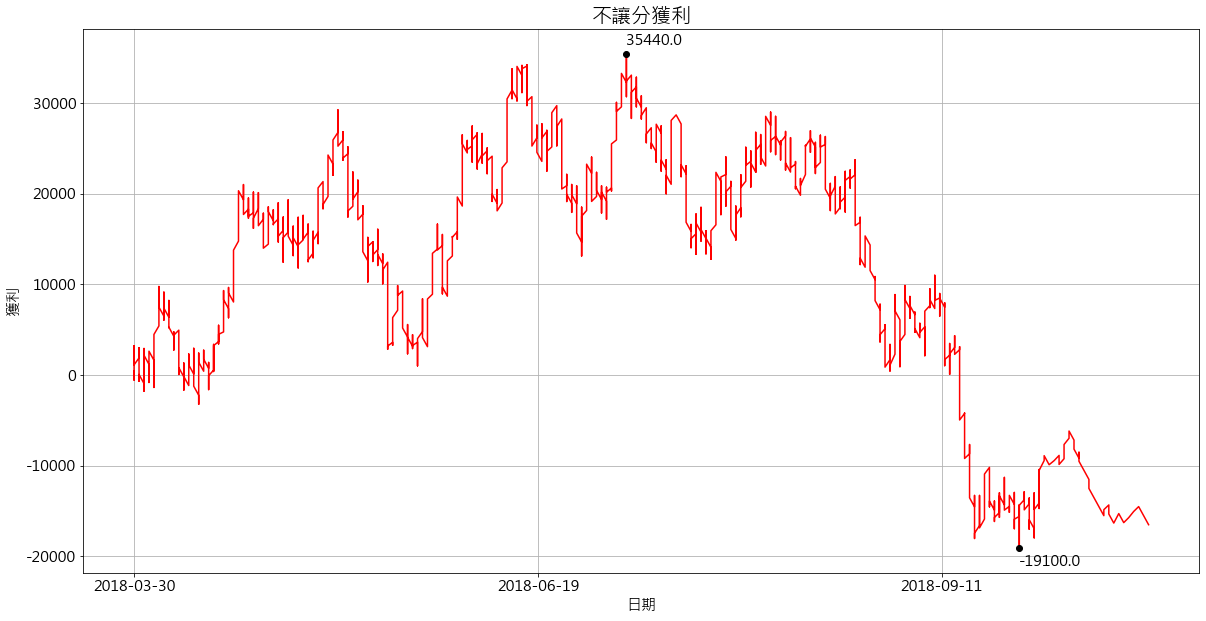

In [669]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 開新一個畫布 
fig = plt.figure(figsize=(20, 10)) # 寬10 長8
gs = GridSpec(1, 1) # 設立1x1的網格

# 設定網格及子圖
ax = plt.subplot(gs[0, 0]) # 子圖ax在網格的[0, 0]

# 畫圖

ax.plot(df_n_1.index,df_n_1["累計獲利"],'r')
plt.plot(o_max.index,int(o_max["累計獲利"]),"ko")
plt.plot(o_min.index,int(o_min["累計獲利"]),"ko")
plt.xlabel("日期",fontsize=15)
plt.ylabel("獲利",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("不讓分獲利",fontsize=20)
plt.annotate(show_max,xy=(o_max.index,int(o_max["累計獲利"])),xytext = (o_max.index,int(o_max["累計獲利"])+1000),fontsize=15)
plt.annotate(show_min,xy=(o_min.index,int(o_min["累計獲利"])),xytext = (o_min.index,int(o_min["累計獲利"])-2000),fontsize=15)
plt.grid()
# 圖調整
tick_spacing = df_n_1.index.size/30 # x軸密集度
ax.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))
plt.show()

In [545]:
df_mon = odd.copy()
df_mon.index = odd.index.strftime("%Y-%m-%d")

In [544]:
group

,主隊,主隊得分,客隊,客隊得分,W/L,Evencode,互對戰勝率(主),互對戰勝率(客),近期對戰勝率(主),近期對戰勝率(客),...,返還率(初),主勝(終),客勝(終),主勝率(終),客勝率(終),返還率(終),賠率變化(主),賠率變化(客),勝率變化(主),勝率變化(客)
比賽時間,,,,,,,,,,,,,,,,,,,,,
2015-03-04,PHI,5,NYY,5,1,65819,55.0,45.0,35.0,55.0,...,94.01,1.78,2.01,53.00,47.00,94.30,-0.05,0.07,1.49,-1.49
2015-03-04,DET,15,BAL,2,1,65818,45.0,55.0,65.0,50.0,...,94.01,1.74,2.05,54.05,45.95,94.27,-0.01,0.02,0.36,-0.36
2015-03-04,TOR,7,PIT,8,0,65820,35.7,64.3,50.0,65.0,...,94.09,1.74,2.05,54.01,45.99,94.07,0.01,-0.02,-0.41,0.41
2015-03-04,CIN,10,CLE,0,1,65821,30.0,70.0,45.0,50.0,...,94.00,1.75,2.04,53.83,46.17,94.19,0.00,0.01,0.06,-0.06
2015-03-04,OAK,9,SFG,4,1,65822,70.0,30.0,40.0,50.0,...,94.04,1.80,1.98,52.45,47.55,94.19,0.02,-0.02,-0.50,0.50


In [546]:
df_g = df_mon.groupby("比賽時間").sum()
date = df_g.index
win_all = []
count_all = []
count = []
rate = []
for i in date:
    group = df_mon[df_mon.index == i]
    win = len(group [group["predict"] == group ["true"]])
    count.append(win)
    count_all.append(len(group))
    if win == 0:
        rate.append(0)
    else:
        rate_one = round((win / len(group))*100,2)
        rate.append(rate_one)
    win_over = len(group [group["每筆獲利"] >= 1000])
    win_all.append(win_over)
df_g["當日賽場數"] = count_all 
df_g["當日勝場數"] = count
df_g["當日獲利大於成本的場次"] = win_all
df_g["當日勝率"] = rate
df_g

,predict,true,主隊得分,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利,當日賽場數,當日勝場數,當日獲利大於成本的場次,當日勝率
比賽時間,,,,,,,,,,,,
2021-04-02,9,8,66,69,27.11,25.12,2530.0,38860.0,13,8,3,61.54
2021-04-03,3,1,30,49,14.70,13.48,2230.0,34870.0,7,5,2,71.43
2021-04-04,9,10,75,47,28.86,26.61,6430.0,130720.0,14,11,4,78.57
2021-04-05,8,4,42,63,25.72,22.13,3630.0,177140.0,12,8,3,66.67
2021-04-06,5,6,54,64,25.69,25.59,1920.0,217140.0,13,8,2,61.54
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,0,1,7,2,1.99,1.84,-1000.0,52070.0,1,0,0,0.00
2021-10-30,1,1,2,0,2.07,1.78,780.0,52850.0,1,1,0,100.00
2021-10-31,0,1,3,2,1.81,2.07,-1000.0,51850.0,1,0,0,0.00


In [547]:
df_g[df_g["每筆獲利"] >3000]

,predict,true,主隊得分,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利,當日賽場數,當日勝場數,當日獲利大於成本的場次,當日勝率
比賽時間,,,,,,,,,,,,
2021-04-04,9,10,75,47,28.86,26.61,6430.0,130720.0,14,11,4,78.57
2021-04-05,8,4,42,63,25.72,22.13,3630.0,177140.0,12,8,3,66.67
2021-04-17,8,7,56,49,25.65,21.49,8500.0,182830.0,12,11,3,91.67
2021-04-19,7,7,51,55,33.27,30.74,4090.0,291390.0,16,10,5,62.50
2021-05-01,12,10,75,53,31.68,28.61,4920.0,87620.0,15,11,3,73.33
2021-05-07,6,3,34,50,21.74,17.69,3410.0,100830.0,10,7,3,70.00
2021-05-09,10,10,90,87,29.70,29.36,5460.0,261440.0,15,11,4,73.33
2021-05-11,3,3,17,23,10.12,9.51,4790.0,87370.0,5,5,2,100.00
2021-05-12,9,9,66,57,31.50,27.27,4620.0,324670.0,15,11,3,73.33


In [548]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

In [568]:
a = df_g[df_g["每筆獲利"] > 0]
a

,predict,true,主隊得分,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利,當日賽場數,當日勝場數,當日獲利大於成本的場次,當日勝率
比賽時間,,,,,,,,,,,,
2021-04-02,9,8,66,69,27.11,25.12,2530.0,38860.0,13,8,3,61.54
2021-04-03,3,1,30,49,14.70,13.48,2230.0,34870.0,7,5,2,71.43
2021-04-04,9,10,75,47,28.86,26.61,6430.0,130720.0,14,11,4,78.57
2021-04-05,8,4,42,63,25.72,22.13,3630.0,177140.0,12,8,3,66.67
2021-04-06,5,6,54,64,25.69,25.59,1920.0,217140.0,13,8,2,61.54
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-21,1,0,3,18,4.97,3.21,60.0,111000.0,2,1,1,50.00
2021-10-27,0,0,2,6,2.07,1.78,1070.0,53070.0,1,1,1,100.00
2021-10-30,1,1,2,0,2.07,1.78,780.0,52850.0,1,1,0,100.00


In [567]:
50/158

0.31645569620253167

In [549]:
o_max = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].max()]
o_min = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].min()]
show_max = str(df_g["每筆獲利"].max())
show_min = str(df_g["每筆獲利"].min())

In [551]:
o_max[["每筆獲利","當日賽場數","當日勝場數","當日勝率"]]

,每筆獲利,當日賽場數,當日勝場數,當日勝率
比賽時間,,,,
2021-04-17,8500.0,12,11,91.67


In [552]:
o_min[["每筆獲利","當日賽場數","當日勝場數","當日勝率"]]

,每筆獲利,當日賽場數,當日勝場數,當日勝率
比賽時間,,,,
2021-08-25,-7670.0,14,4,28.57


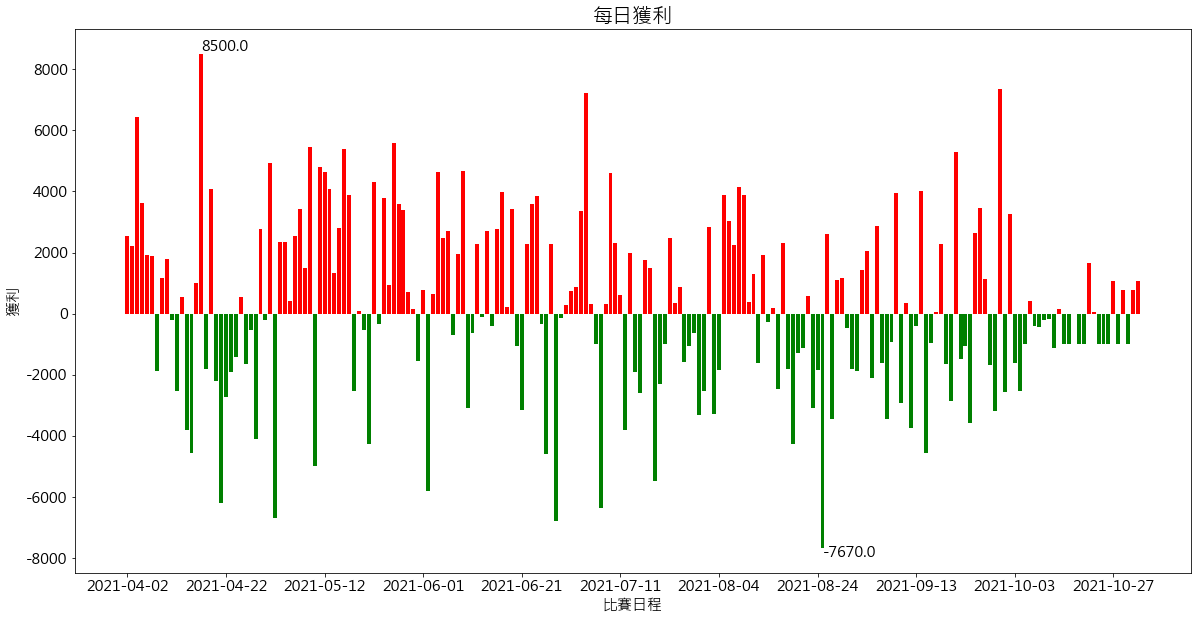

In [558]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.bar(df_g.index,df_g["每筆獲利"],color= ["r" if df_g["每筆獲利"][i]>0 else "g"  for i in range(len(df_g))])
plt.xlabel("比賽日程", fontsize=15)
plt.ylabel("獲利", fontsize=15)
plt.title("每日獲利", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.annotate(show_max,xy=(o_max.index,int(o_max["每筆獲利"])),xytext = (o_max.index,int(o_max["每筆獲利"])+100),fontsize=15)
plt.annotate(show_min,xy=(o_min.index,int(o_min["每筆獲利"])),xytext = (o_min.index,int(o_min["每筆獲利"])-300),fontsize=15)
x_major_locator=MultipleLocator(20)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.show()

In [585]:
df_mon = odd.copy()
df_mon.index = odd.index.strftime("%Y-%m")

In [586]:
df_g = df_mon .groupby("比賽時間").sum()
date = df_g.index
win_all = []
count_all = []
count = []
rate = []
for i in date:
    group = df_mon[df_mon.index == i]
    win = len(group [group["predict"] == group ["true"]])
    count.append(win)
    count_all.append(len(group))
    if win == 0:
        rate.append(0)
    else:
        rate_one = round((win / len(group))*100,2)
        rate.append(rate_one)
    win_over = len(group [group["每筆獲利"] >= 1000])
    win_all.append(win_over)
df_g["當月賽場數"] = count_all 
df_g["當月勝場數"] = count
df_g["當月獲利大於成本的場次"] = win_all
df_g["當月勝率"] = rate
df_g

,predict,true,主隊得分,客隊得分,客勝(終),主勝(終),每筆獲利,累計獲利,當月賽場數,當月勝場數,當月獲利大於成本的場次,當月勝率
比賽時間,,,,,,,,,,,,
2021-04,202,184,1594,1527,773.63,691.18,3310.0,4387640.0,366,202,52,55.19
2021-05,259,230,1874,1801,881.18,775.72,51520.0,12407640.0,417,264,55,63.31
2021-06,231,240,1940,1684,853.85,719.57,18750.0,26798880.0,394,241,34,61.17
2021-07,208,199,1724,1756,786.24,686.10,-1700.0,29566810.0,369,212,32,57.45
2021-08,246,215,1918,1858,912.08,781.39,-7140.0,31563480.0,413,252,19,61.02
2021-09,237,202,1808,1924,879.91,765.55,-1190.0,24448950.0,404,241,28,59.65
2021-10,42,58,465,380,204.89,164.89,-11700.0,5536410.0,92,48,7,52.17
2021-11,0,0,5,16,3.85,3.85,1850.0,106330.0,2,2,1,100.00


In [587]:
o_max = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].max()]
o_min = df_g[df_g["每筆獲利"] == df_g["每筆獲利"].min()]
show_max = str(df_g["每筆獲利"].max())
show_min = str(df_g["每筆獲利"].min())

In [590]:
df_g[["每筆獲利","當月賽場數","當月勝場數","當月獲利大於成本的場次","當月勝率"]]

,每筆獲利,當月賽場數,當月勝場數,當月獲利大於成本的場次,當月勝率
比賽時間,,,,,
2021-04,3310.0,366,202,52,55.19
2021-05,51520.0,417,264,55,63.31
2021-06,18750.0,394,241,34,61.17
2021-07,-1700.0,369,212,32,57.45
2021-08,-7140.0,413,252,19,61.02
2021-09,-1190.0,404,241,28,59.65
2021-10,-11700.0,92,48,7,52.17
2021-11,1850.0,2,2,1,100.00


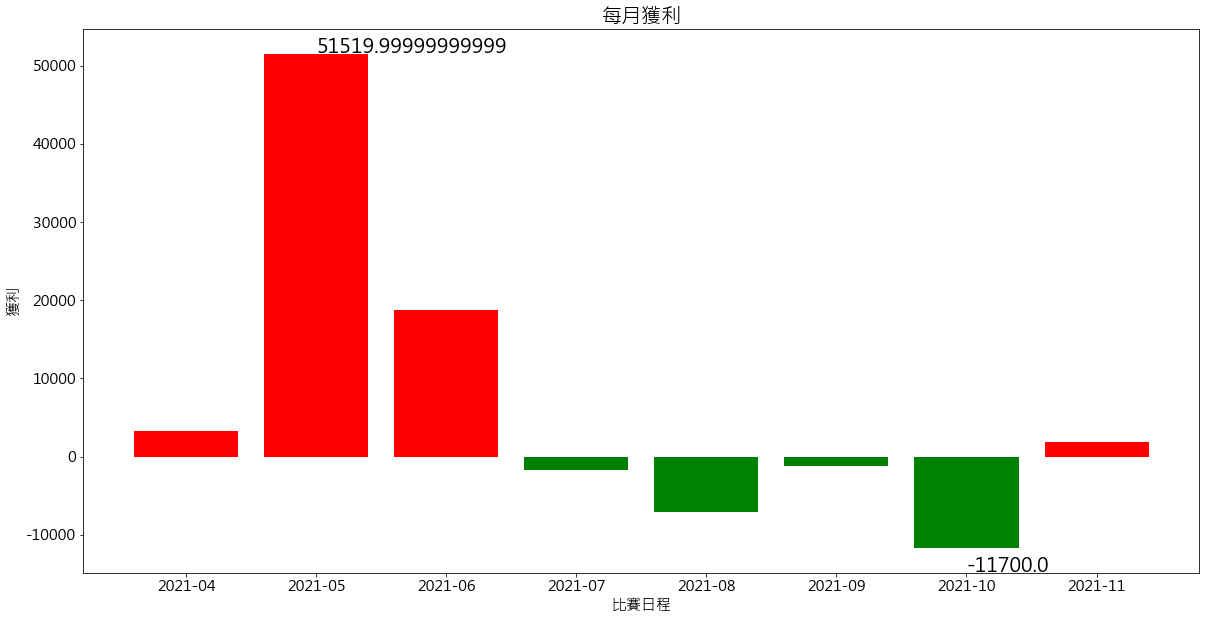

In [591]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.bar(df_g.index,df_g["每筆獲利"],color= ["r" if df_g["每筆獲利"][i]>0 else "g"  for i in range(len(df_g))])
plt.xlabel("比賽日程", fontsize=15)
plt.ylabel("獲利", fontsize=15)
plt.title("每月獲利", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.annotate(show_max,xy=(o_max.index,int(o_max["每筆獲利"])),xytext = (o_max.index,int(o_max["每筆獲利"])+100),fontsize=20)
plt.annotate(show_min,xy=(o_min.index,int(o_min["每筆獲利"])),xytext = (o_min.index,int(o_min["每筆獲利"])-3000),fontsize=20)
#x_major_locator=MultipleLocator(20)
#把x轴的刻度间隔设置为1，并存在变量里
#ax=plt.gca()
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
plt.show()